## Submit job

In [12]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from pathlib import Path

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path="program/chevron_pattern.py",
    device_id="urchin-pulse",
    name="chevron_pattern",
)
print(f"job_id = {job.job_id}")
job.wait_for_completion()
print(f"job_status = {job.status}")
print(f"elapsed_time={job.execution_time}")

job_id = 068d44cf-8a69-7bbd-8000-e62ed35217cd
job_status = succeeded
elapsed_time=523.78


## Download job result

In [13]:
Path("download").mkdir(exist_ok=True)
backend.download_log(
    job_id=job.job_id,
    save_dir="download",
)


'download/sselog_068d44cf-8a69-7bbd-8000-e62ed35217cd.zip'

## Extract zip file

In [ ]:
import zipfile
zip_path = Path(f"download/sselog_{job.job_id}.zip")
extract_dir = Path("extracted")

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)
log_path = extract_dir / "ssecontainer.log"
new_log_path = extract_dir / f"sselog_{job.job_id}.log"

# rename
if log_path.exists():
    log_path.rename(new_log_path)

print("extracted file:", list(extract_dir.rglob("*")))

with new_log_path.open(encoding="utf-8") as f:
    for i, line in enumerate(f, start=1):
        print(f"{i}: {line.strip()}")

extracted file: [PosixPath('extracted/sselog_068d43a1-8db5-7ed2-8000-a70b43690f76.log'), PosixPath('extracted/sselog_068d44cf-8a69-7bbd-8000-e62ed35217cd.log'), PosixPath('extracted/sselog_068d448d-9e95-713f-8000-205d35190713.log'), PosixPath('extracted/sselog_068d4398-51f5-79c9-8000-eca7e8f7b08e.log'), PosixPath('extracted/ssecontainer_068d438e-ab45-7d8b-8000-49abd316f766.log'), PosixPath('extracted/sselog_068d4466-1937-7e0c-8000-82f3289c43c7.log'), PosixPath('extracted/sselog_068d43c0-bf35-7017-8000-2912b8176b35.log'), PosixPath('extracted/sselog_068d43e5-89ff-717f-8000-6979c4aaae95.log'), PosixPath('extracted/sselog_068d4433-e736-7b6b-8000-d30f24c2934f.log'), PosixPath('extracted/sselog_068d43d7-2c3a-776e-8000-70b2ffcb2a20.log')]
1: Python 3.11.9 (main, Sep  4 2024, 23:15:21) [GCC 12.2.0] on linux
2: Type "help", "copyright", "credits" or "license" for more information.
3: >>> start program
4: Failed to load the skew file: 'NoneType' object is not subscriptable
5: ==================

## Extract payload

In [6]:
from pathlib import Path
import ast

payloads = []
with new_log_path.open(encoding="utf-8") as f:
    for line in f:
        if "payload=" in line:
            rhs = line.split("payload=", 1)[1].strip()
            try:
                data = ast.literal_eval(rhs)
                payloads.append(data)
            except Exception as e:
                print("parse error:", e)

print(payloads)


[{'time_range': [0.0, 8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0, 80.0, 88.0, 96.0, 104.0, 112.0, 120.0, 128.0, 136.0, 144.0, 152.0, 160.0, 168.0, 176.0, 184.0, 192.0, 200.0, 208.0, 216.0, 224.0, 232.0, 240.0, 248.0, 256.0, 264.0, 272.0, 280.0, 288.0, 296.0, 304.0, 312.0, 320.0, 328.0, 336.0, 344.0, 352.0, 360.0, 368.0, 376.0, 384.0, 392.0, 400.0], 'detuning_range': [-0.05, -0.048, -0.046, -0.044, -0.042, -0.04, -0.038, -0.036, -0.034, -0.032, -0.03, -0.028, -0.026, -0.024, -0.022, -0.02, -0.018, -0.016, -0.014, -0.012, -0.01, -0.008, -0.006, -0.004, -0.002, 0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042, 0.044, 0.046, 0.048, 0.05], 'frequencies': {'Q024': 4.554583799621359}, 'chevron_data': {'Q024': [[1.0174939632415771, 1.0099190473556519, 0.9967269897460938, 1.0172920227050781, 0.9974279999732971, 1.036242961883545, 1.0453139543533325, 0.9841700196266174, 0.9901999831199646, 

## Plot IQ data

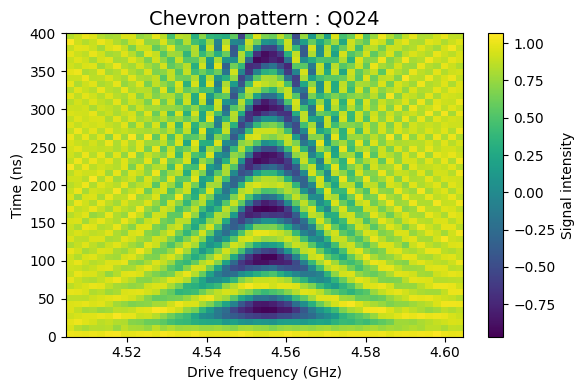

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = payloads[0]
detuning_range = np.array(p["detuning_range"])
frequencies = p["frequencies"]
time_range = np.array(p["time_range"])
target = "Q024"
chevron_data = p["chevron_data"]


fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(
    chevron_data[target],
    aspect="auto",
    origin="lower",
    extent=[
        detuning_range[0] + frequencies[target],
        detuning_range[-1] + frequencies[target],
        time_range[0],
        time_range[-1],
    ],
    cmap="viridis",
)

ax.set_title(f"Chevron pattern : {target}", fontsize=14)
ax.set_xlabel("Drive frequency (GHz)")
ax.set_ylabel("Time (ns)")


cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Signal intensity")

plt.tight_layout()
plt.show()
